###### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



In [5]:
df=pd.read_csv("Melbourne_housing_FULL.csv")

In [7]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [8]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [9]:

cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
df = df[cols_to_use]

In [10]:
df.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [12]:
df.shape

(34857, 15)

In [15]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [18]:

fill_na = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
df.loc[:, fill_na] = df[fill_na].fillna(0)


In [19]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [24]:
df.loc[:, 'Landsize'] = df['Landsize'].fillna(df['Landsize'].mean())
df.loc[:, 'BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())

In [25]:
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [27]:
df = df.copy()
df.dropna(inplace=True)


In [28]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [31]:
 # one hot encode the categorical features
df = df.copy()
df = pd.get_dummies(df, drop_first=True)


In [32]:
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [9]:
x = df.drop('Price',axis=1)
y= df['Price']

In [10]:
x

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [36]:
y

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 27244, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=2)


In [38]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression().fit(train_x,train_y)


In [39]:
Lr.score(test_x,test_y)

0.1385368316157536

In [40]:
Lr.score(train_x,train_y)

0.6827792395792723

In [43]:
from sklearn import linear_model
lesso_reg= linear_model.Lasso(alpha=50, max_iter=100,tol=0.1)
lesso_reg.fit(train_x,train_y)

,alpha,50
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,100
,tol,0.1
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [44]:
lesso_reg.score(test_x,test_y)

0.6636111369404488

In [48]:

from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_x, train_y)

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,100
,tol,0.1
,solver,'auto'
,positive,False
,random_state,None


In [49]:
ridge_reg.score(train_x,train_y)

0.6622376739684328

In [51]:
ridge_reg.score(test_x,test_y)

0.6670848945194958

In [58]:
from sklearn.linear_model import ElasticNet

Elas_reg= ElasticNet(alpha=0.05, max_iter=100, tol=0.1)
Elas_reg.fit(train_x, train_y)

,alpha,0.05
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,100
,copy_X,True
,tol,0.1
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [59]:
Elas_reg.score(train_x,train_y)

0.6165217498423174

In [60]:
Elas_reg.score(test_x,test_y)


0.6267222988549789

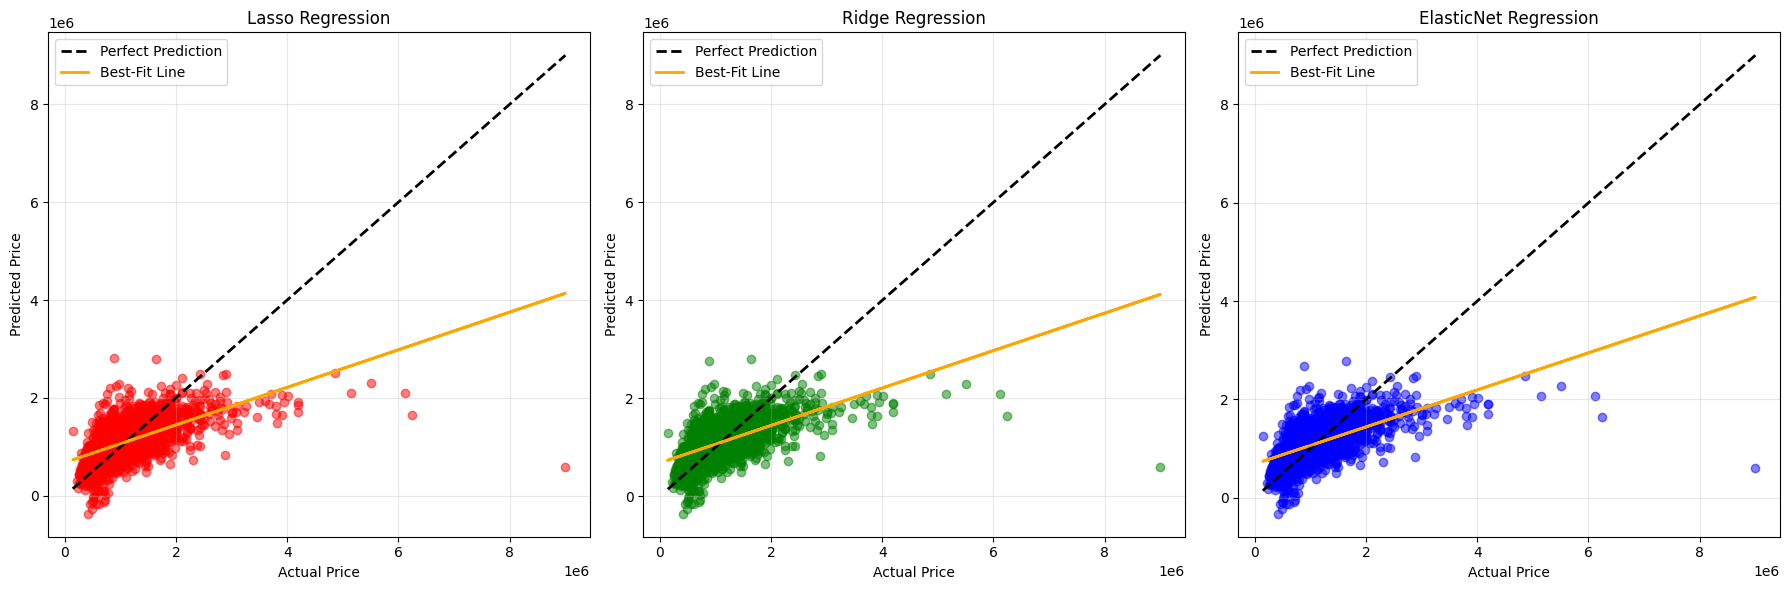

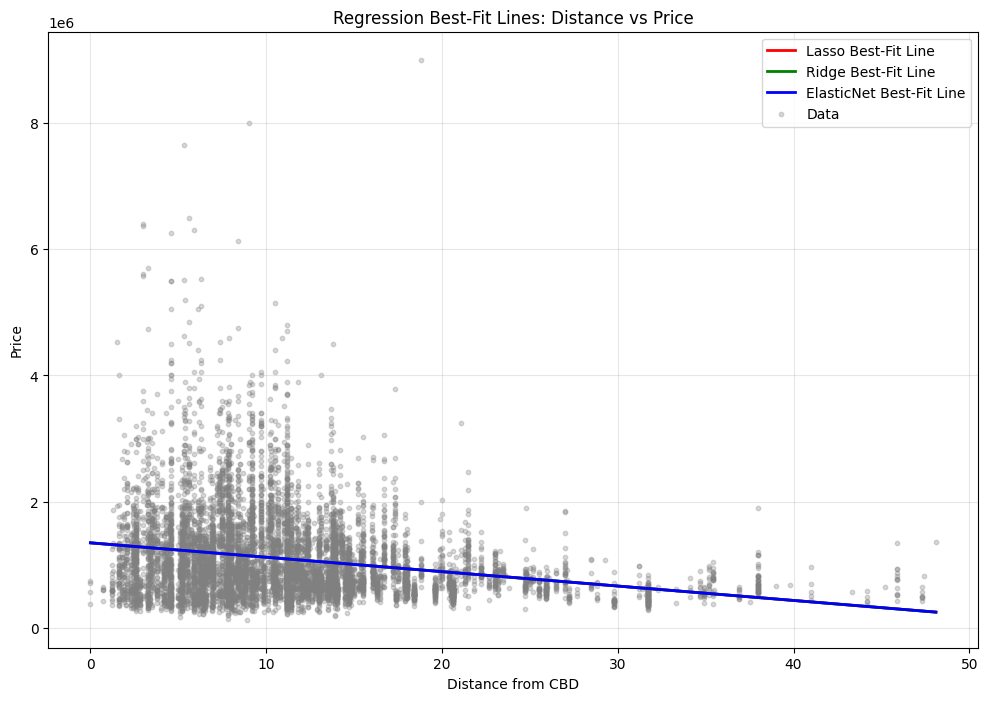

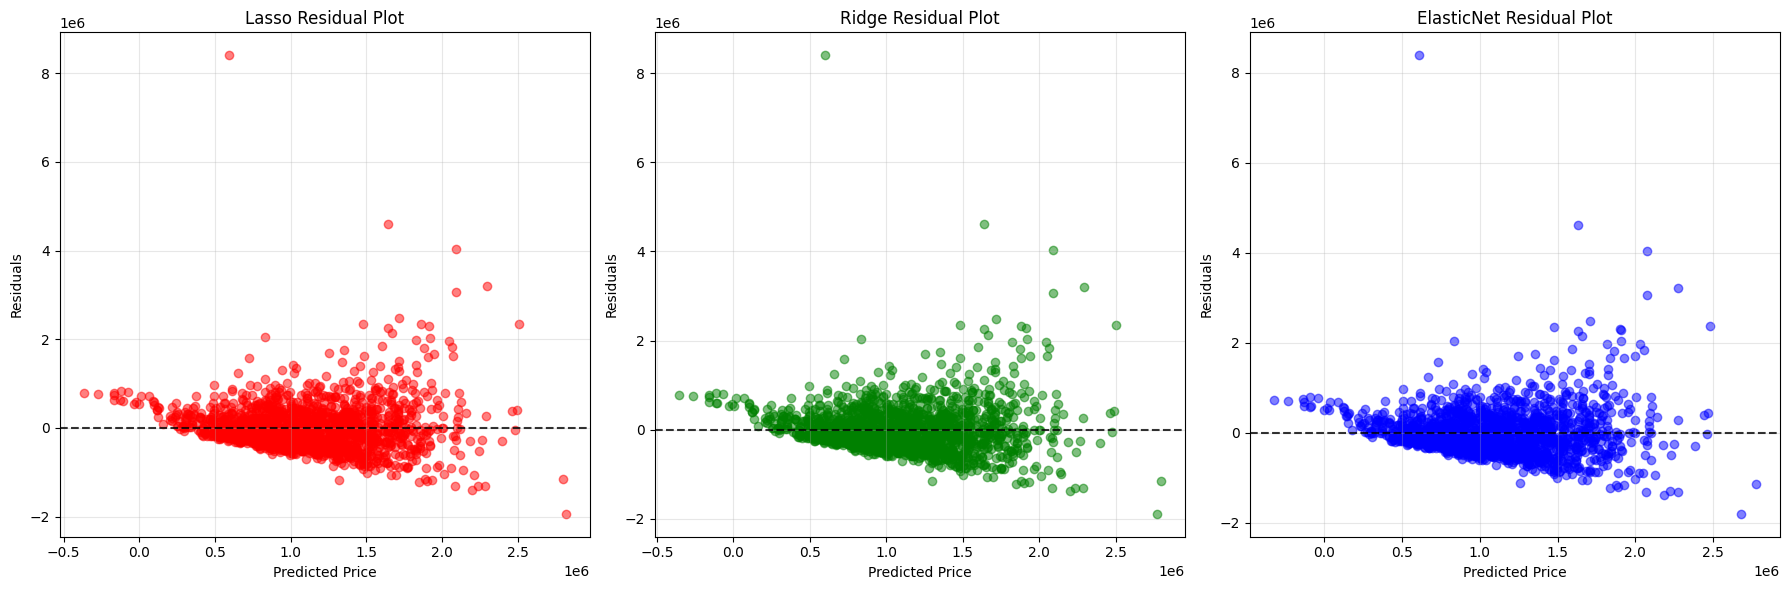

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Melbourne housing data
df = pd.read_csv("Melbourne_housing_FULL.csv")

# Select relevant numerical features and target (you can adjust as needed)
features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']
target = 'Price'
data = df[features + [target]].dropna()
X = data[features]
y = data[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model parameters from your notebook
models = {
    'Lasso': Lasso(alpha=50, max_iter=100, tol=0.1),
    'Ridge': Ridge(alpha=50, max_iter=100, tol=0.1),
    'ElasticNet': ElasticNet(alpha=0.05, max_iter=100, tol=0.1)
}
colors = {'Lasso': 'red', 'Ridge': 'green', 'ElasticNet': 'blue'}

# Fit and predict
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions[name] = model.predict(X_test_scaled)

# Visualize Actual vs Predicted with regression best-fit line
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, (name, y_pred) in enumerate(predictions.items()):
    axes[idx].scatter(y_test, y_pred, alpha=0.5, color=colors[name])
    # Perfect prediction line
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Prediction")
    # Best-fit line
    fit = np.polyfit(y_test, y_pred, 1)
    axes[idx].plot(y_test, np.poly1d(fit)(y_test), color='orange', linewidth=2, label="Best-Fit Line")
    axes[idx].set_xlabel("Actual Price")
    axes[idx].set_ylabel("Predicted Price")
    axes[idx].set_title(f"{name} Regression")
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize single feature regression lines (example: Distance)
single_feature = 'Distance'
X_single = data[[single_feature]].values
y_single = data[target].values
plt.figure(figsize=(12, 8))
for name, color in colors.items():
    model = models[name]
    model.fit(X_single, y_single)
    X_range = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1, 1)
    y_range_pred = model.predict(X_range)
    plt.plot(X_range, y_range_pred, color=color, linewidth=2, label=f"{name} Best-Fit Line")
plt.scatter(X_single, y_single, color='gray', alpha=0.3, s=10, label="Data")
plt.xlabel("Distance from CBD")
plt.ylabel("Price")
plt.title("Regression Best-Fit Lines: Distance vs Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Residual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, (name, y_pred) in enumerate(predictions.items()):
    residuals = y_test - y_pred
    axes[idx].scatter(y_pred, residuals, alpha=0.5, color=colors[name])
    axes[idx].axhline(y=0, color='black', linestyle='--', alpha=0.8)
    axes[idx].set_xlabel("Predicted Price")
    axes[idx].set_ylabel("Residuals")
    axes[idx].set_title(f"{name} Residual Plot")
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
